# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library for handle warning
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATA

**Melakukan import data .csv from data preprocessing yang sudah bersih**

In [2]:
df = pd.read_csv('D:\MyProject\Telco Churn Prediction\DATA\data_clean.csv')

In [3]:
df.head()

,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),...,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,-1.280248,-1.161694,-0.994194,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,0
2,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,1,0,0,0,0,1,1
3,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,1,1,0,0,0,0
4,-1.239504,0.196178,-0.940457,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,1


# SPLITTING DATA

In [4]:
# Splitting Dataset into train and test set

X = df.drop('Churn', axis=1)
y = df['Churn']

In [5]:
from sklearn.model_selection import train_test_split # import train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5625, 26)
(1407, 26)


# MODELLING

## RANDOM FOREST

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # import library for call random forest algorithm

param_grid = {
 'n_estimators': [200, 500, 700],
 'max_features': ['sqrt', 'log2'],
 'max_depth' : [10,20,30,40,50],
 'criterion' :['gini', 'entropy'],
}

rfc=RandomForestClassifier(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, verbose=3, param_grid=param_grid, cv = 3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.801 total time=   1.2s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.801 total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.795 total time=   1.2s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.797 total time=   3.4s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.804 total time=   2.8s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.801 total time=   2.8s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=700;, score=0.801 total time=   3.8s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=700;, score=0.803 total time=   3.8s
[CV 3/3] END criterion=gini, max_depth=10,

[CV 2/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=200;, score=0.786 total time=   1.2s
[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=200;, score=0.788 total time=   1.5s
[CV 1/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=500;, score=0.790 total time=   3.4s
[CV 2/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=500;, score=0.784 total time=   3.5s
[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=500;, score=0.786 total time=   3.5s
[CV 1/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=700;, score=0.792 total time=   4.6s
[CV 2/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=700;, score=0.785 total time=   4.6s
[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=700;, score=0.787 total time=   4.7s
[CV 1/3] END criterion=gini, max_depth=50, max_features=log2, n_estimators=200;, score=0.795 total time=

[CV 2/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=200;, score=0.781 total time=   1.6s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=200;, score=0.786 total time=   1.5s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=500;, score=0.791 total time=   3.8s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=500;, score=0.786 total time=   3.8s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=500;, score=0.789 total time=   4.3s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=700;, score=0.793 total time=   5.5s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=700;, score=0.786 total time=   5.5s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=700;, score=0.787 total time=   5.5s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=log2, n_estimators=20

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [28]:
clf = RandomForestClassifier(n_estimators=200,criterion='entropy', max_depth=10, max_features='sqrt', random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc = clf.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [29]:
# Training Model
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=0)

In [30]:
# Making Prediction
pred_rf = rfc.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix # algorithm for confusion matrix
from sklearn.metrics import classification_report # algorithm for classification report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_test, pred_rf)*100,2),"%")
print('Precision :', round(precision_score(y_test, pred_rf, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_test, pred_rf, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_test,	pred_rf, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 80.03 %
Precision : 78.98 %
Recall : 80.03 %
f1-score : 79.2 %


In [32]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.51      0.57       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



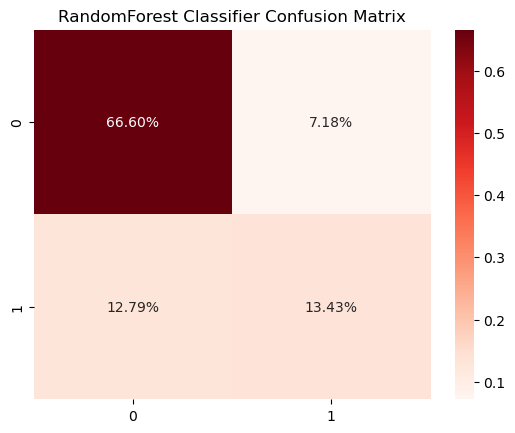

In [33]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

## DECISION TREE

In [13]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
  'splitter' : ['best', 'random'],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'criterion' :['gini', 'entropy']
}

dfc=DecisionTreeClassifier(random_state=0)
CV_dfc = GridSearchCV(estimator=dfc, verbose=3, param_grid=param_grid, cv = 3)
CV_dfc.fit(X_train, y_train)
CV_dfc.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=best;, score=0.758 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=best;, score=0.752 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=

[CV 2/3] END criterion=gini, max_depth=50, max_features=sqrt, splitter=random;, score=0.724 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, splitter=random;, score=0.731 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=50, max_features=log2, splitter=best;, score=0.731 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=50, max_features=log2, splitter=best;, score=0.710 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=50, max_features=log2, splitter=best;, score=0.725 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.714 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.726 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.720 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=60, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] EN

[CV 3/3] END criterion=gini, max_depth=100, max_features=sqrt, splitter=random;, score=0.731 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=100, max_features=log2, splitter=best;, score=0.731 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=100, max_features=log2, splitter=best;, score=0.710 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=100, max_features=log2, splitter=best;, score=0.725 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=100, max_features=log2, splitter=random;, score=0.714 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=100, max_features=log2, splitter=random;, score=0.726 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=100, max_features=log2, splitter=random;, score=0.720 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[C

[CV 1/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=sqrt, splitter=best;, score=0.736 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=sqrt, splitter=best;, score=0.730 total time=   0.0

[CV 1/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=best;, score=0.733 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=best;, score=0.741 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=best;, score=0.724 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=random;, score=0.728 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=random;, score=0.722 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=random;, score=0.723 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=100, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=100, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=100, max_features=auto, splitter=best;, score=nan total ti

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [34]:
clf = DecisionTreeClassifier(splitter='random',criterion='gini', max_depth=10, max_features='sqrt', random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
dfc = clf.fit(X_train,y_train)
y_pred = dfc.predict(X_test)

In [35]:
# Training Model
dfc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=0,
                       splitter='random')

In [36]:
# Making Prediction
pred_dt = dfc.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix # algorithm for confusion matrix
from sklearn.metrics import classification_report # algorithm for classification report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_test, pred_dt)*100,2),"%")
print('Precision :', round(precision_score(y_test, pred_dt, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_test, pred_dt, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_test,	pred_dt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 77.68 %
Precision : 76.57 %
Recall : 77.68 %
f1-score : 76.93 %


In [38]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1038
           1       0.59      0.49      0.53       369

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



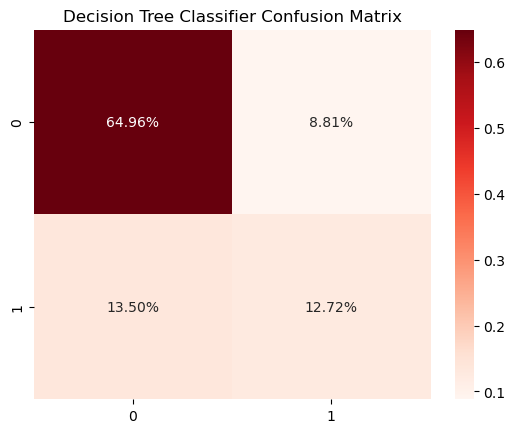

In [39]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=12)
plt.show()

## SVM

In [20]:
from sklearn.svm import SVC

param_grid = {
    'kernel':['rbf'], 
    'C':[0.0001, 1, 10], 
    'gamma':[1, 10, 100]
}

sv = SVC(random_state=0)
CV_sv = GridSearchCV(estimator=sv, verbose = 3, param_grid=param_grid, cv= 3)
CV_sv.fit(X_train, y_train)
CV_sv.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.733 total time=   1.1s
[CV 2/3] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.733 total time=   1.1s
[CV 3/3] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.733 total time=   1.0s
[CV 1/3] END ....C=0.0001, gamma=10, kernel=rbf;, score=0.733 total time=   1.0s
[CV 2/3] END ....C=0.0001, gamma=10, kernel=rbf;, score=0.733 total time=   1.1s
[CV 3/3] END ....C=0.0001, gamma=10, kernel=rbf;, score=0.733 total time=   1.1s
[CV 1/3] END ...C=0.0001, gamma=100, kernel=rbf;, score=0.733 total time=   1.7s
[CV 2/3] END ...C=0.0001, gamma=100, kernel=rbf;, score=0.733 total time=   1.7s
[CV 3/3] END ...C=0.0001, gamma=100, kernel=rbf;, score=0.733 total time=   1.9s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.783 total time=   2.3s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.780 total time=   2.2s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;,

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [40]:
model_svm = SVC(C = 1, kernel='rbf', gamma = 1, random_state=0)

In [41]:
model_svm.fit(X_train, y_train)

SVC(C=1, gamma=1, random_state=0)

In [42]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [43]:
# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_test, pred_svm)*100,2),"%")
print('Precision :', round(precision_score(y_test, pred_svm, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_test, pred_svm, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_test,	pred_svm, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 79.18 %
Precision : 77.69 %
Recall : 79.18 %
f1-score : 77.51 %


In [44]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1038
           1       0.66      0.42      0.52       369

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.78      0.79      0.78      1407



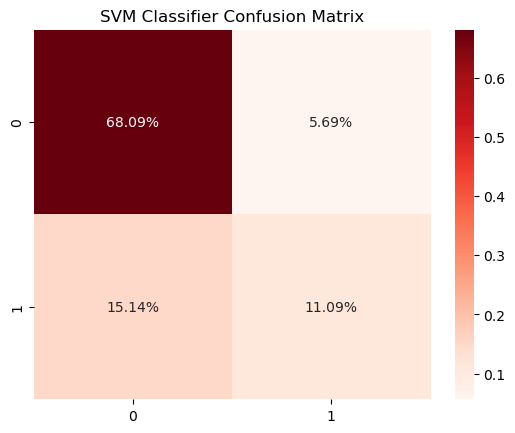

In [45]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("SVM Classifier Confusion Matrix",fontsize=12)
plt.show()

**Seperti yang Anda lihat, akurasinya cukup rendah, dan karena ini merupakan kumpulan data yang tidak seimbang, kita tidak boleh menganggap Akurasi sebagai metrik untuk mengukur model, karena Akurasi dikutuk dalam kumpulan data yang tidak seimbang.
Oleh karena itu, kita perlu memeriksa skor recall, presisi & f1 untuk kelas minoritas, dan cukup jelas bahwa skor presisi, recall & f1 terlalu rendah untuk Kelas 1, yaitu pelanggan yang churn.
Oleh karena itu, selanjutnya memanggil SMOTEENN (UpSampling + ENN)**

# MODELLING USING SMOOTE FOR IMBALANCE DATA

In [46]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()

X_resampling, y_resampling = sm.fit_resample(X,y)

In [47]:
X_resampling.shape, y_resampling.shape

((6550, 26), (6550,))

In [49]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_resampling, y_resampling, test_size=0.2, random_state=0)

## RANDOM FOREST USING SMOOTE 

In [50]:
param_grid = {
 'n_estimators': [200, 500, 700],
 'max_features': ['sqrt', 'log2'],
 'max_depth' : [10,20,30,40,50],
 'criterion' :['gini', 'entropy'],
}

rfc=RandomForestClassifier(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, verbose=3, param_grid=param_grid, cv = 3)
CV_rfc.fit(X_trains, y_trains)
CV_rfc.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.950 total time=   1.2s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.947 total time=   1.1s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.939 total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.952 total time=   2.8s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.950 total time=   2.7s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.939 total time=   2.4s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=700;, score=0.951 total time=   3.5s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=700;, score=0.948 total time=   3.6s
[CV 3/3] END criterion=gini, max_depth=10,

[CV 2/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=200;, score=0.953 total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=200;, score=0.944 total time=   1.1s
[CV 1/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=500;, score=0.955 total time=   2.7s
[CV 2/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=500;, score=0.954 total time=   2.6s
[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=500;, score=0.944 total time=   2.5s
[CV 1/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=700;, score=0.956 total time=   3.9s
[CV 2/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=700;, score=0.953 total time=   3.9s
[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=700;, score=0.944 total time=   3.7s
[CV 1/3] END criterion=gini, max_depth=50, max_features=log2, n_estimators=200;, score=0.955 total time=

[CV 2/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=200;, score=0.954 total time=   1.1s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=200;, score=0.943 total time=   1.1s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=500;, score=0.954 total time=   3.3s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=500;, score=0.955 total time=   3.0s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=500;, score=0.946 total time=   3.1s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=700;, score=0.953 total time=   4.4s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=700;, score=0.954 total time=   4.3s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=700;, score=0.945 total time=   4.1s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=log2, n_estimators=20

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [73]:
clf_smt = RandomForestClassifier(criterion='gini', n_estimators=200, max_depth=20, max_features='sqrt', random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc_smt = clf_smt.fit(X_trains, y_trains)
y_pred = rfc_smt.predict(X_tests)

In [74]:
# Training Model
rfc_smt.fit(X_trains, y_trains)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=0)

In [75]:
# Making Prediction
pred_rf_smt = rfc_smt.predict(X_tests)

In [76]:
# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_tests, pred_rf_smt)*100,2),"%")
print('Precision :', round(precision_score(y_tests, pred_rf_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_tests, pred_rf_smt, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_tests,	pred_rf_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 96.87 %
Precision : 96.88 %
Recall : 96.87 %
f1-score : 96.87 %


In [77]:
print(classification_report(y_tests,pred_rf_smt))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       576
           1       0.96      0.98      0.97       734

    accuracy                           0.97      1310
   macro avg       0.97      0.97      0.97      1310
weighted avg       0.97      0.97      0.97      1310



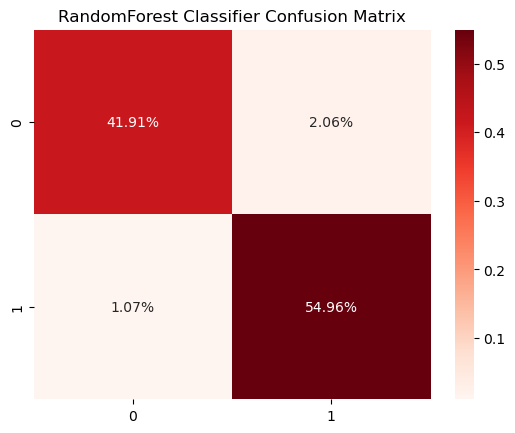

In [78]:
# confusion Maxtrix
cm3 = confusion_matrix(y_tests, pred_rf_smt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

## DECISION TREE USING SMOOTE

In [57]:
param_grid = {
  'splitter' : ['best', 'random'],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'criterion' :['gini', 'entropy']
}

dfc=DecisionTreeClassifier(random_state=0)
CV_dfc = GridSearchCV(estimator=dfc, verbose=3, param_grid=param_grid, cv = 3)
CV_dfc.fit(X_trains, y_trains)
CV_dfc.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=best;, score=0.911 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=best;, score=0.926 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=

[CV 1/3] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.910 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.919 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.910 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=60, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=60, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=60, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=60, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=60, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=60, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criter

[CV 2/3] END criterion=gini, max_depth=100, max_features=log2, splitter=best;, score=0.926 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=100, max_features=log2, splitter=best;, score=0.926 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=100, max_features=log2, splitter=random;, score=0.910 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=100, max_features=log2, splitter=random;, score=0.919 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=100, max_features=log2, splitter=random;, score=0.910 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[C

[CV 1/3] END criterion=entropy, max_depth=40, max_features=log2, splitter=random;, score=0.920 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=log2, splitter=random;, score=0.930 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=log2, splitter=random;, score=0.921 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=nan total time=

[CV 3/3] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=random;, score=0.927 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=best;, score=0.918 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=best;, score=0.923 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=best;, score=0.926 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=random;, score=0.920 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=random;, score=0.930 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=log2, splitter=random;, score=0.921 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=100, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=100, max_features=auto, splitter=best;, score=nan total

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [79]:
clf_smt = DecisionTreeClassifier(splitter='random', criterion='gini', max_depth=20, max_features='sqrt', random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
dfc_smt = clf_smt.fit(X_trains,y_trains)
y_pred_df = dfc_smt.predict(X_tests)

In [80]:
# Training Model
dfc_smt.fit(X_trains, y_trains)

DecisionTreeClassifier(max_depth=20, max_features='sqrt', random_state=0,
                       splitter='random')

In [81]:
# Making Prediction
pred_dt_smt = dfc_smt.predict(X_tests)

In [82]:
from sklearn.metrics import confusion_matrix # algorithm for confusion matrix
from sklearn.metrics import classification_report # algorithm for classification report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_tests, pred_dt_smt)*100,2),"%")
print('Precision :', round(precision_score(y_tests, pred_dt_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_tests, pred_dt_smt, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_tests,	pred_dt_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 92.44 %
Precision : 92.45 %
Recall : 92.44 %
f1-score : 92.43 %


In [83]:
print(classification_report(y_tests,pred_dt_smt))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       576
           1       0.92      0.95      0.93       734

    accuracy                           0.92      1310
   macro avg       0.92      0.92      0.92      1310
weighted avg       0.92      0.92      0.92      1310



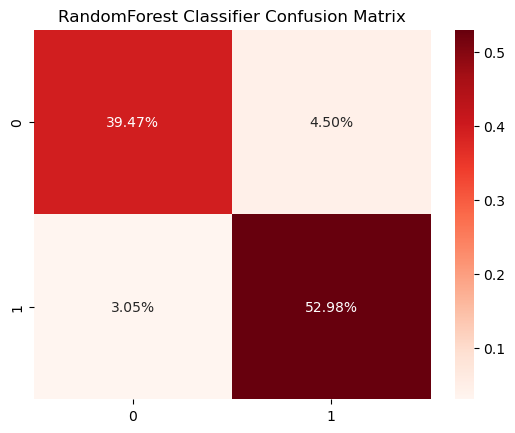

In [84]:
# confusion Maxtrix
cm3 = confusion_matrix(y_tests, pred_dt_smt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Decision Tree Confusion Matrix",fontsize=12)
plt.show()

## SVM USING SMOOTE

In [64]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']
}

sv_smt = SVC(random_state = 0)
CV_sv_smt = GridSearchCV(estimator=sv_smt, verbose = 3, param_grid=param_grid, cv= 3)
CV_sv_smt.fit(X_trains, y_trains)
CV_sv_smt.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   1.7s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   1.6s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   1.7s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.911 total time=   0.7s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.908 total time=   0.8s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.904 total time=   0.8s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.904 total time=   1.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.884 total time=   0.9s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.888 total time=   0.8s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.876 total time=   1.7s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.864 total time=   1.6s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [101]:
model_svm_smt = SVC(C = 1000, gamma = 1, kernel='rbf', random_state = 0)
model_svm_smt.fit(X_trains, y_trains)
y_pred_svm = model_svm_smt.predict(X_tests)

In [102]:
# Making Prediction
pred_svm_smt = model_svm_smt.predict(X_tests)

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

print('Accuracy :', round(accuracy_score(y_tests, pred_svm_smt)*100,2),"%")
print('Precision:', round(precision_score(y_tests, pred_svm_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall:', round(recall_score(y_tests, pred_svm_smt, average='weighted', zero_division=0)*100,2), "%")
print('f1-score:',round(f1_score(y_tests,pred_svm_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 97.18 %
Precision: 97.18 %
Recall: 97.18 %
f1-score: 97.18 %


In [104]:
print(classification_report(y_tests,pred_svm_smt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       576
           1       0.97      0.98      0.97       734

    accuracy                           0.97      1310
   macro avg       0.97      0.97      0.97      1310
weighted avg       0.97      0.97      0.97      1310



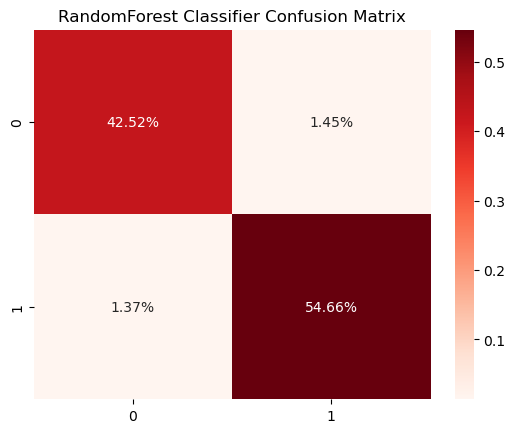

In [105]:
# confusion Maxtrix
cm3 = confusion_matrix(y_tests, pred_svm_smt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("SVM Confusion Matrix",fontsize=12)
plt.show()

In [106]:
# best model
model = model_svm_smt

In [107]:
# Export the objects using pickle
with open(r"svm.joblib", 'wb') as file:
    pickle.dump({'model': model}, file) 

In [108]:
# Load the exported objects from the file
with open(r"svm.joblib", 'rb') as file:
    loaded_objects = pickle.load(file)

In [99]:
model = loaded_objects['model']
# You can now use the loaded objects in your app or script

In [100]:
model

SVC(C=1000, gamma=1, random_state=0)